In [1]:
import numpy as np 
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt 
import seaborn as sns

## Generate the binary and normal vectors

In [2]:
def generate_binary_vector (nvector, ndim): 
    rng=np.random.default_rng() 
    return rng.integers(0, 2, size=(nvector, ndim))

In [3]:
def generate_normal_vector (nvector, ndim, mean=0, std=1): 
    rng=np.random.default_rng() 
    return rng.normal(mean, std, size=(nvector, ndim))

## Calculate the distance and draw the picture

In [4]:
def vect_dist():
    ndims = [10, 100, 1000, 10000]
    nvectors = 100
    fig, axes = plt.subplots(3, 4, figsize=(20, 15)) 

    for i, dim in enumerate(ndims):
        # Hamming Distance
        binary_vector = generate_binary_vector(nvectors, dim)
        binary_distance_matrix = ssd.cdist(binary_vector,binary_vector, metric='hamming')
        binary_distance_vector=ssd.squareform(binary_distance_matrix)
        sns.histplot(data=binary_distance_vector, bins=25, color='blue', alpha=0.2, kde=True, ax=axes[0, i])
        axes[0, i].set_title('Hamming Distance of Binary')
        axes[0, i].set_xlabel('Hamming Distance')

        #Euclidean Distance 
        normal_vector=generate_normal_vector(nvectors, dim, mean=0, std=1) 
        normal_Euclidean_matrix=ssd.cdist(normal_vector, normal_vector, metric='euclidean')
        normal_Euclidean_vector=ssd.squareform(normal_Euclidean_matrix) 
        sns.histplot(data=normal_Euclidean_vector, bins=25, color='red', alpha=0.2, kde=True, ax=axes[1, i]) 
        axes[1, i].set_title('Euclidean Distance of Normal') 
        axes[2, i].set_xlabel('Euclidean Distance')

        ## Cosine Distance 
        normal_cosine_matrix=ssd.pdist(normal_vector, metric='cosine')  
        sns.histplot(data=normal_cosine_matrix, bins=25, color='orange', alpha=0.5,kde=True, ax=axes[2, i]) 
        axes[2, i].set_title('Cosine Distance of Normal') 
        axes[2, i].set_xlabel('Cosine Distance') 
        
    plt.show()

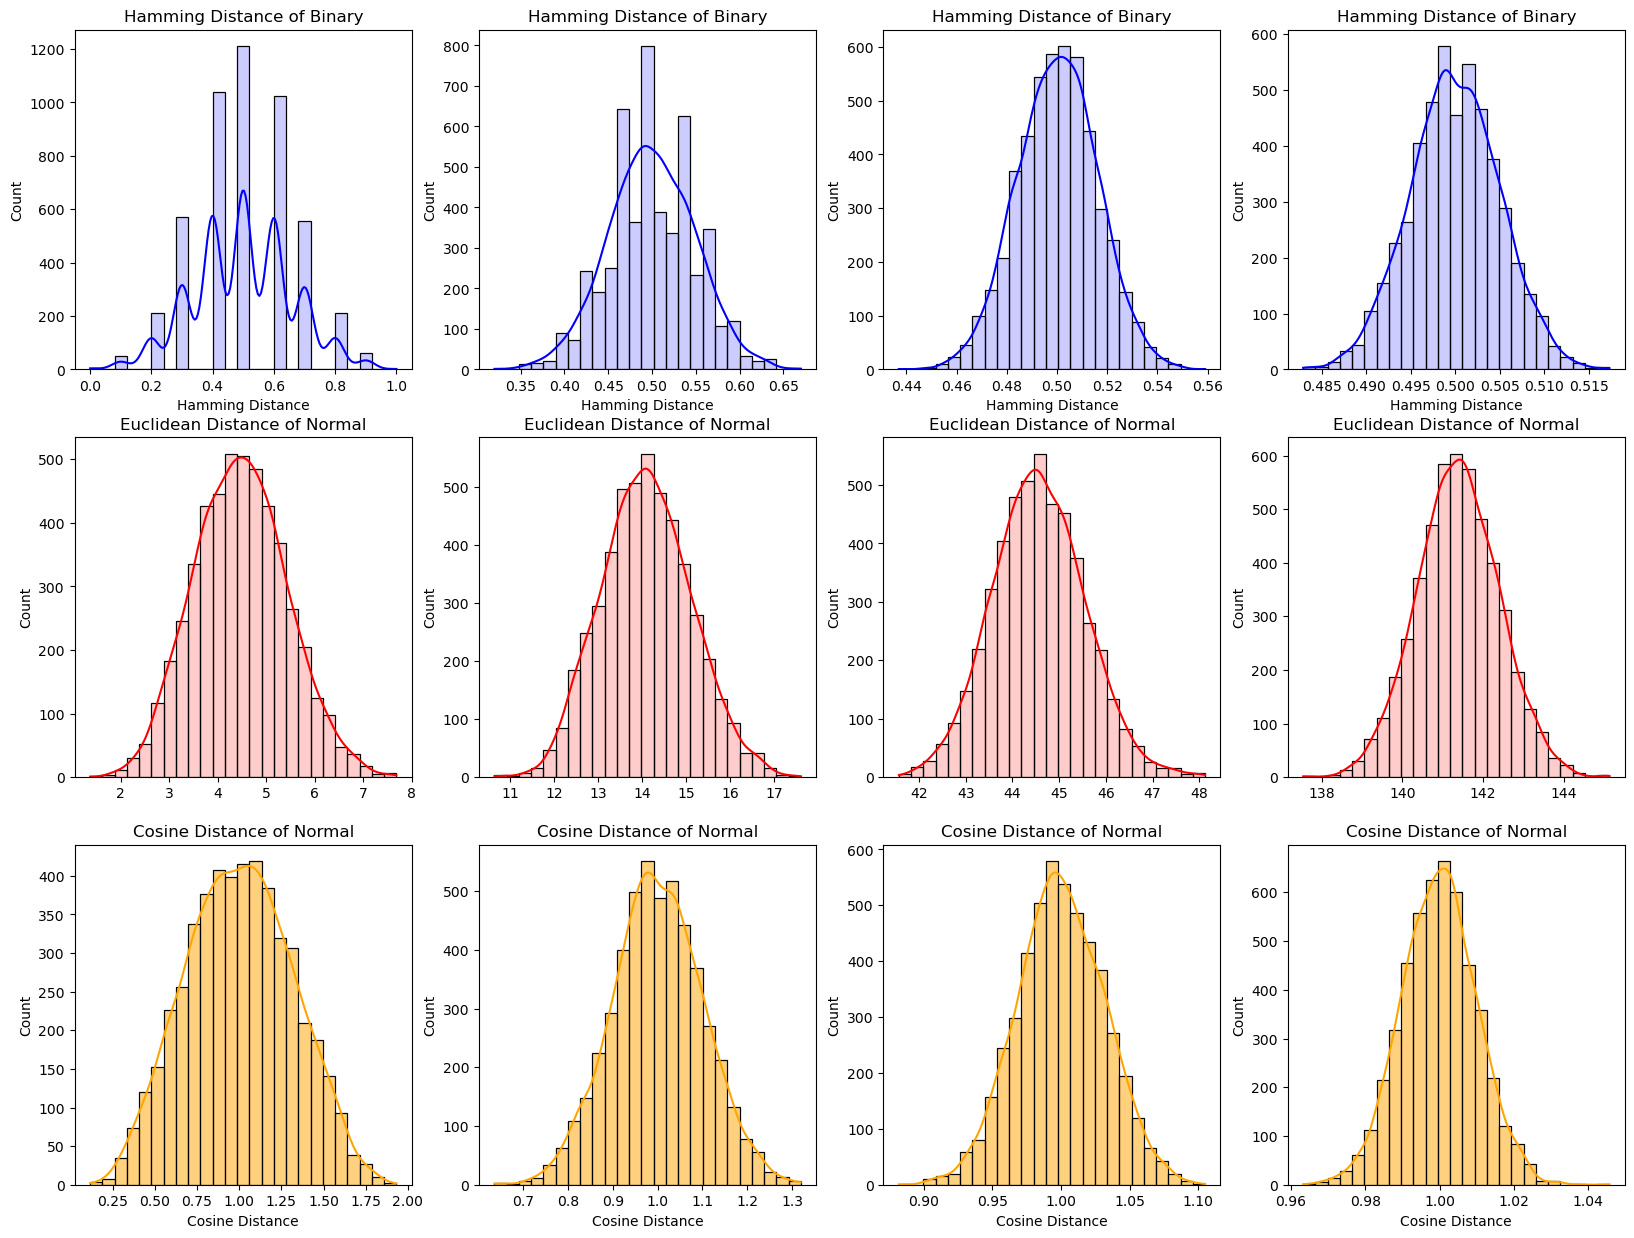

In [5]:
vect_dist()

With the increasement of dimension, the Hamming distance begin to cluster around 0.5, and the differences decreases.

Besides, both the mean value and range of  the Euclidean distance expands. 

Additionally, the cosine distance become extremely close to 1.

## Noise on Binary Vector

In [6]:
nvectors = 100  
iterations = 100  
ndims = [10, 100, 1000, 10000] 
noise_proportions = np.linspace(0, 1, 21)  

In [7]:
performance = np.zeros((iterations, len(noise_proportions), len(ndims)))

In [8]:
# choose the tenth vector as the parent vector, and then 
for countndim, ndim in enumerate(ndims): 
    for countnoise, noise_proportion in enumerate(noise_proportions): 
        for counteriter in range(iterations): 
            rng=np.random.default_rng() 
            vectors=rng.integers(0, 2, size=(nvectors, ndim)) #binary vectors

            parent_vector=vectors[10].copy() 
            #adding noise 
            nreplace=int(noise_proportion * ndim) 
            noise=rng.integers(0, 2, size=parent_vector.shape) 
            parent_vector[:nreplace]=noise[:nreplace] 

            #calculating distance 
            parent_vector=parent_vector[np.newaxis,:] 
            distances=ssd.cdist(parent_vector, vectors, metric='hamming').flatten()

            #find the minist one 
            min_index=np.argmin(distances) 

            #identify parent vactor 
            if min_index==10:
                performance[counteriter, countnoise, countndim] = 1                   

In [9]:
mean_performance=np.mean(performance, axis=0)

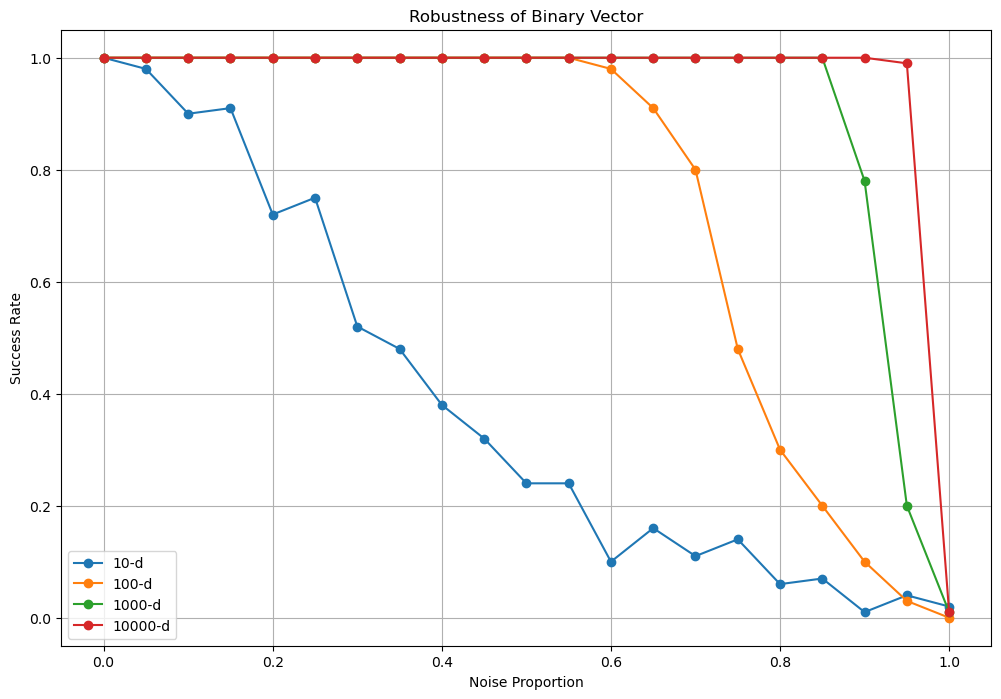

In [10]:
plt.figure(figsize=(12, 8))
for countndim, ndim in enumerate(ndims):
    plt.plot(noise_proportions, mean_performance[:, countndim], label=f"{ndim}-d", marker='o')
plt.xlabel('Noise Proportion')
plt.ylabel('Success Rate')
plt.title('Robustness of Binary Vector')
plt.legend()
plt.grid(True)
plt.show()


## Noise on Normal Vector

In [11]:
nvectors = 100  
iterations = 100  
ndims = [10, 100, 1000, 10000] 
noise_proportions = np.linspace(0, 1, 21)  

In [12]:
performance2 = np.zeros((iterations, len(noise_proportions), len(ndims)))

for countndim, ndim in enumerate(ndims): 
    for countnoise, noise_proportion in enumerate(noise_proportions): 
        for counteriter in range(iterations): 
            rng=np.random.default_rng() 
            vectors=rng.normal( size=(nvectors, ndim)) #normal vectors

            parent_vector=vectors[10].copy() 
            
            #adding noise 
            sigma=noise_proportion
            noise=rng.normal(0, sigma, size=parent_vector.shape)
            parent_vector += noise 

            #calculating distance 
            parent_vector=parent_vector[np.newaxis,:] 
            distances=ssd.cdist(parent_vector, vectors, metric='euclidean').flatten()

            #find the minist one 
            min_index=np.argmin(distances) 

            #identify parent vactor 
            if min_index==10:
                performance2[counteriter, countnoise, countndim] = 1                   

In [13]:
mean_performance2=np.mean(performance2, axis=0)

In [14]:
mean_performance2[:4]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

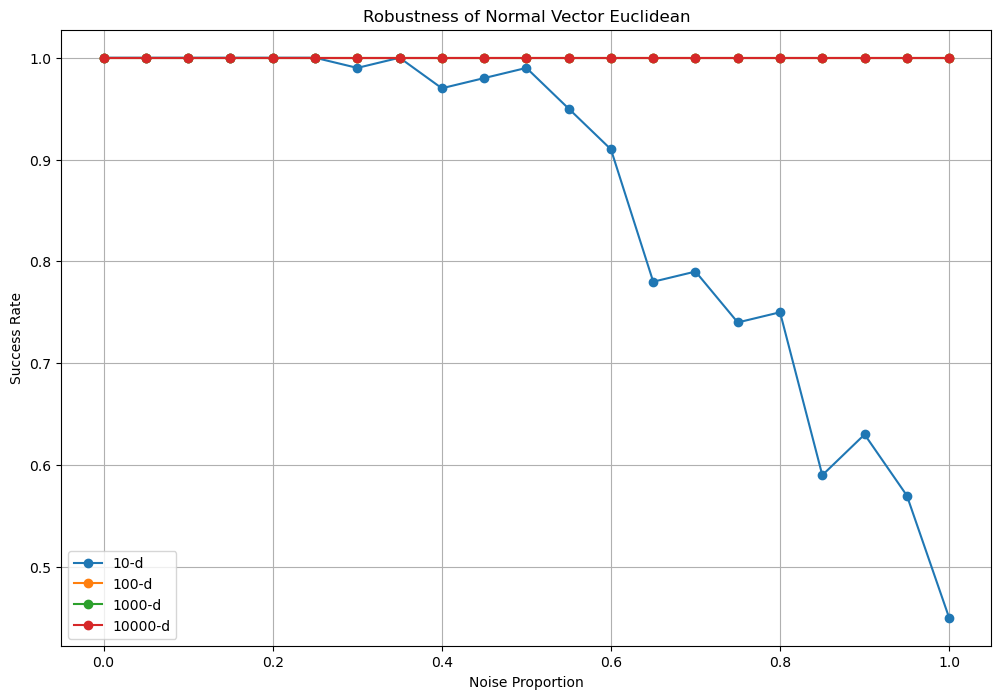

In [15]:
plt.figure(figsize=(12, 8))
for countndim, ndim in enumerate(ndims):
    plt.plot(noise_proportions, mean_performance2[:, countndim], label=f"{ndim}-d", marker='o')
plt.xlabel('Noise Proportion')
plt.ylabel('Success Rate')
plt.title('Robustness of Normal Vector Euclidean')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
nvectors = 100  
iterations = 100  
ndims = [10, 100, 1000, 10000] 
noise_proportions = np.linspace(0, 1, 21)  

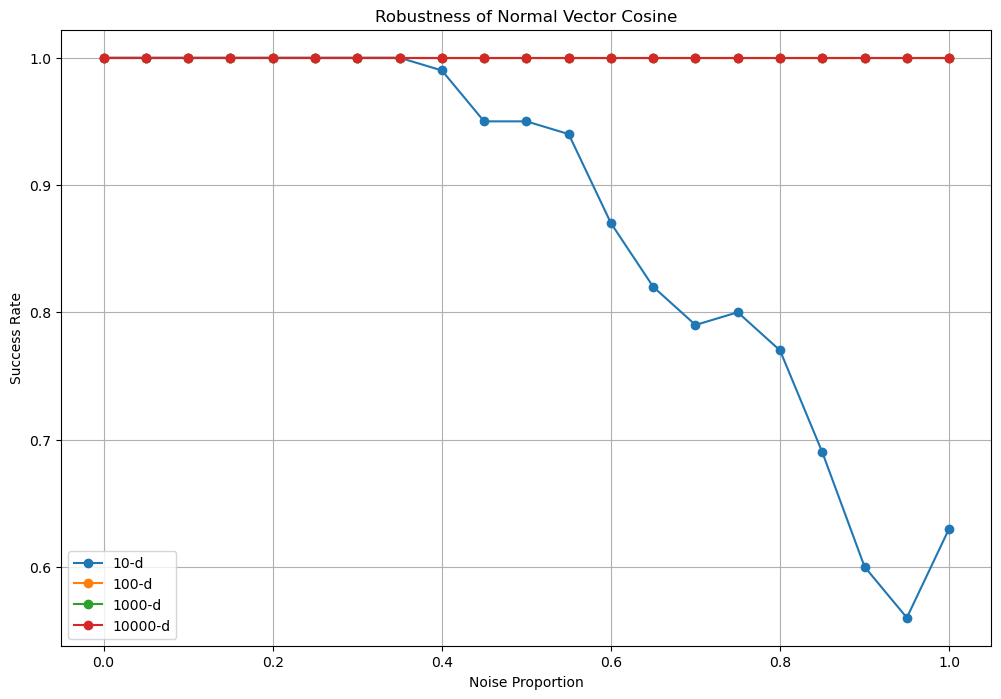

In [17]:
performance3 = np.zeros((iterations, len(noise_proportions), len(ndims)))

for countndim, ndim in enumerate(ndims): 
    for countnoise, noise_proportion in enumerate(noise_proportions): 
        for counteriter in range(iterations): 
            rng=np.random.default_rng() 
            vectors=rng.normal( size=(nvectors, ndim)) #normal vectors

            parent_vector=vectors[10].copy() 
            #adding noise 
            sigma=noise_proportion
            noise=rng.normal(0, sigma, size=parent_vector.shape)
            parent_vector += noise 

            #calculating distance 
            parent_vector=parent_vector[np.newaxis,:] 
            distances=ssd.cdist(parent_vector, vectors, metric='cosine').flatten()

            #find the minist one 
            min_index=np.argmin(distances) 

            #identify parent vactor 
            if min_index==10:
                performance3[counteriter, countnoise, countndim] = 1

mean_performance3=np.mean(performance3, axis=0)

plt.figure(figsize=(12, 8))
for countndim, ndim in enumerate(ndims):
    plt.plot(noise_proportions, mean_performance3[:, countndim], label=f"{ndim}-d", marker='o')
plt.xlabel('Noise Proportion')
plt.ylabel('Success Rate')
plt.title('Robustness of Normal Vector Cosine')
plt.legend()
plt.grid(True)
plt.show()
